In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [4]:
HKexport = pd.read_csv('HK_exports_to_korea_preprocessed.csv')
KRseizure = pd.read_csv('KR_MethSeizure_preprocessed.csv').drop(columns=['Unnamed: 0'])

In [5]:
display(HKexport)
display(HKexport.info())

,Year,HK_export_to_Korea
0,1972-01-01,10
1,1972-02-01,13
2,1972-03-01,11
3,1972-04-01,13
4,1972-05-01,13
...,...,...
637,2025-02-01,4885
638,2025-03-01,5200
639,2025-04-01,4843
640,2025-05-01,4672


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                642 non-null    object
 1   HK_export_to_Korea  642 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


None

In [7]:
display(KRseizure)
display(KRseizure.info())

,date,seizure
0,2001-02-01,5830.0
1,2001-03-01,4035.0
2,2001-04-01,3636.0
3,2001-05-01,42145.0
4,2001-06-01,2973.0
...,...,...
288,2025-02-01,22929.0
289,2025-03-01,15695.0
290,2025-04-01,33653.0
291,2025-05-01,3346.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     293 non-null    object 
 1   seizure  293 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


None

In [6]:
df = pd.merge(KRseizure, HKexport, left_on='date', right_on='Year').drop(columns=['Year'])

In [7]:
df

,date,seizure,HK_export_to_Korea
0,2001-02-01,5830.0,2205
1,2001-03-01,4035.0,2257
2,2001-04-01,3636.0,2224
3,2001-05-01,42145.0,2185
4,2001-06-01,2973.0,1877
...,...,...,...
288,2025-02-01,22929.0,4885
289,2025-03-01,15695.0,5200
290,2025-04-01,33653.0,4843
291,2025-05-01,3346.0,4672


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                293 non-null    object 
 1   seizure             293 non-null    float64
 2   HK_export_to_Korea  293 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ KB


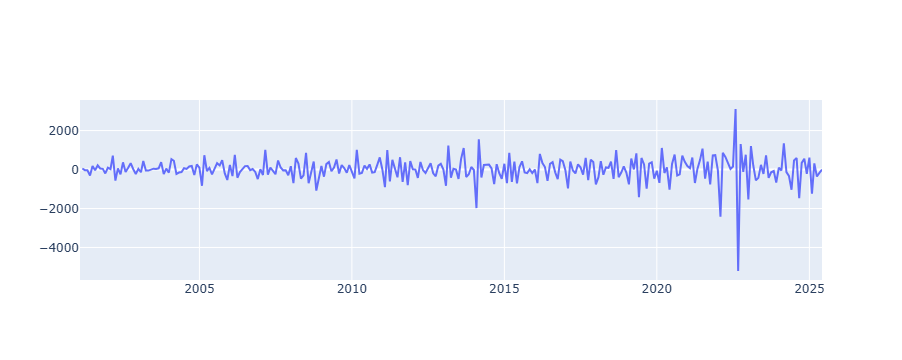

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['HK_export_to_Korea'].diff(), mode='lines'))
fig.show()

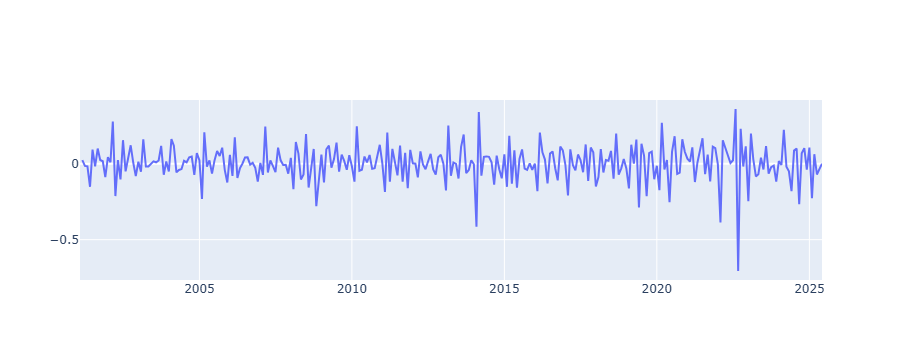

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=np.log(df['HK_export_to_Korea']).diff(), mode='lines'))
fig.show()

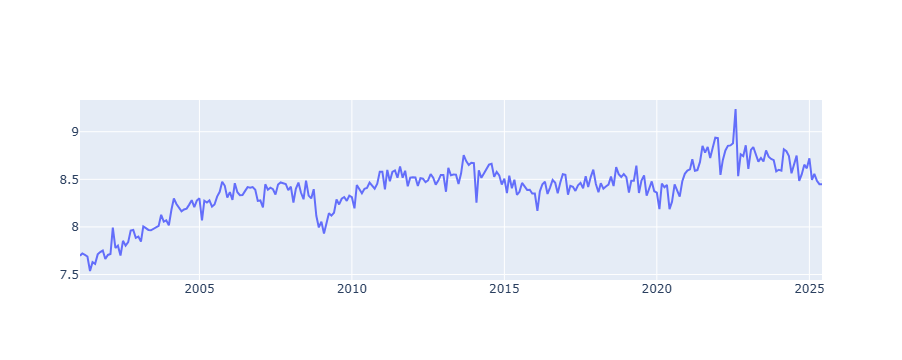

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=np.log(df['HK_export_to_Korea']), mode='lines'))
fig.show()

In [34]:
# 쓸 독립변수: 로그 취하고 차분
ind = np.log(df['HK_export_to_Korea']).diff()

In [44]:
ind

0           NaN
1      0.023309
2     -0.014729
3     -0.017692
4     -0.151941
         ...   
288   -0.226862
289    0.062489
290   -0.071124
291   -0.035947
292   -0.000642
Name: HK_export_to_Korea, Length: 293, dtype: float64

In [38]:
ind.info()

<class 'pandas.core.series.Series'>
RangeIndex: 293 entries, 0 to 292
Series name: HK_export_to_Korea
Non-Null Count  Dtype  
--------------  -----  
292 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [35]:
ind.describe()

count    292.000000
mean       0.002569
std        0.119155
min       -0.706260
25%       -0.057663
50%        0.006453
75%        0.072784
max        0.359902
Name: HK_export_to_Korea, dtype: float64

In [8]:
# 1. 변환 x
from statsmodels.tsa.stattools import adfuller
col='HK_export_to_Korea'
result = adfuller(df[col])
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: HK_export_to_Korea
Test statistic: -2.5679399998312675
p-value: 0.09980609084147762
The time series is non-stationary



In [9]:
# ind 정상성 충족 확인
# 로그 변화율 둘 다 적용: 변화율만 적용해도 정상성 만족. 그러나 이분산성 해소 위해 로그 적용
from statsmodels.tsa.stattools import adfuller
col = 'HK_export_to_Korea'
result = adfuller(np.log(df[col]).diff().drop(0, axis=0))
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: HK_export_to_Korea
Test statistic: -4.001884027129241
p-value: 0.001400678001202088
The time series is stationary



In [10]:
# 로그만 적용
from statsmodels.tsa.stattools import adfuller
col = 'HK_export_to_Korea'
result = adfuller(np.log(df[col]).drop(0, axis=0))
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: HK_export_to_Korea
Test statistic: -2.792314738350658
p-value: 0.059379966426733766
The time series is non-stationary



In [12]:
# 변화율만 적용

from statsmodels.tsa.stattools import adfuller
col = 'HK_export_to_Korea'
result = adfuller(df[col].diff().drop(0, axis=0))
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: HK_export_to_Korea
Test statistic: -3.8588295787397797
p-value: 0.0023596215220511607
The time series is stationary



In [52]:
df['HK_exports_to_Korea_logdiff'] = ind
df.drop(columns='HK_export_to_Korea', inplace=True)
df

,date,seizure,HK_exports_to_Korea_logdiff
0,2001-02-01,5830.0,NaN
1,2001-03-01,4035.0,0.023309
2,2001-04-01,3636.0,-0.014729
3,2001-05-01,42145.0,-0.017692
4,2001-06-01,2973.0,-0.151941
...,...,...,...
288,2025-02-01,22929.0,-0.226862
289,2025-03-01,15695.0,0.062489
290,2025-04-01,33653.0,-0.071124
291,2025-05-01,3346.0,-0.035947


In [53]:
df.to_csv('regression.csv', index=False)

In [54]:
pd.read_csv('regression.csv')

,date,seizure,HK_exports_to_Korea_logdiff
0,2001-02-01,5830.0,NaN
1,2001-03-01,4035.0,0.023309
2,2001-04-01,3636.0,-0.014729
3,2001-05-01,42145.0,-0.017692
4,2001-06-01,2973.0,-0.151941
...,...,...,...
288,2025-02-01,22929.0,-0.226862
289,2025-03-01,15695.0,0.062489
290,2025-04-01,33653.0,-0.071124
291,2025-05-01,3346.0,-0.035947
